# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")




In [90]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import datetime as dt
import time




In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.2.3
pandas version: 2.2.3
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [8]:
# Try loading one file

df = pd.read_parquet('trip_records/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

In [ ]:
df.shape

(3041714, 19)

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour  

#group by date and hour
df_grouped = df.groupby(['pickup_date','pickup_hour'])

#sample the data with 5% of the data
df_sample = df_grouped.apply(lambda x: x.sample(frac=0.05))
df_sample.shape

#concatenate the data
# sampled_data = pd.concat(df_sample, axis=0)

(152087, 21)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('E:/Learning/Upgrad/ML C73/EDA on NYC Taxi Records/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')
# print(os.getcwd())

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_name)
        # Reading the current file
        pf = pd.read_parquet(file_name)

        pf['pickup_date'] = pf['tpep_pickup_datetime'].dt.date
        pf['pickup_hour'] = pf['tpep_pickup_datetime'].dt.hour  

        #group by date and hour
        df_grouped = pf.groupby(['pickup_date','pickup_hour'])

        #sample the data with 5% of the data
        sampled_data = df_grouped.apply(lambda x: x.sample(frac=0.05))
        sampled_data.reset_index(drop=True, inplace=True)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        # sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True, sort=False)  # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

2023-1.parquet
2023-10.parquet
2023-11.parquet
2023-12.parquet
2023-2.parquet
2023-3.parquet
2023-4.parquet
2023-5.parquet
2023-6.parquet
2023-7.parquet
2023-8.parquet
2023-9.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('E:/Learning/Upgrad/ML C73/EDA on NYC Taxi Records/Datasets and Dictionary-NYC/Datasets and Dictionary/Sampled_data.parquet')
# df.shape

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df_sampled = pd.read_parquet('E:/Learning/Upgrad/ML C73/EDA on NYC Taxi Records/Datasets and Dictionary-NYC/Datasets and Dictionary/Sampled_data.parquet')
df_sampled.shape

(1896400, 22)

In [10]:
df_sampled.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2022-12-31 23:59:37   2023-01-01 00:07:28              1.0   
1         1  2023-01-01 00:34:52   2023-01-01 00:44:07              1.0   
2         2  2023-01-01 00:54:18   2023-01-01 01:24:33              2.0   
3         1  2023-01-01 00:45:20   2023-01-01 00:56:03              1.0   
4         2  2023-01-01 00:46:18   2023-01-01 00:54:19              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.38         1.0                  N           142           151   
1           1.00        99.0                  N            42            74   
2           3.30         1.0                  N           234           142   
3           1.60         3.0                  N           246           249   
4           1.42         1.0                  N           239            50   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        4.28           0.0   
1             1  ...      0.5        0.00           0.0   
2             1  ...      0.5        7.95           0.0   
3             1  ...      0.0        0.00           5.0   
4             1  ...      0.5        3.75           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         21.38                   2.5          0.0   
1                    1.0         13.70                   0.0          0.0   
2                    1.0         39.75                   2.5          0.0   
3                    1.0         36.00                   0.0          0.0   
4                    1.0         18.75                   2.5          0.0   

   pickup_date  pickup_hour Airport_fee  
0   2022-12-31           23         NaN  
1   2023-01-01            0         NaN  
2   2023-01-01            0         NaN  
3   2023-01-01            0         NaN  
4   2023-01-01            0         NaN  

[5 rows x 22 columns]

In [145]:
df_sampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 22 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [13]:
# Fix the index and drop any columns that are not needed
df_sampled.reset_index(drop=True, inplace=True)
df_sampled.drop(columns=['store_and_fwd_flag'],  inplace=True)




**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [14]:
# Combine the two airport fee columns
df_sampled['airport_fee'] = df_sampled['airport_fee'].fillna(0) + df_sampled['Airport_fee'].fillna(0)

df_sampled.drop(columns=['Airport_fee'],  inplace=True)

# df_sampled.isnull().sum()


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative
df_sampled[df_sampled['fare_amount'] < 0]
#No Negative Values in fare amount found


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts
df_sampled[df_sampled['fare_amount'] < 0]['RatecodeID']



Series([], Name: RatecodeID, dtype: float64)

In [17]:
# Find which columns have negative values
# df_sampled.columns[(df_sampled < 0).any()]

numerical_columns = [c for c in df_sampled.columns if df_sampled[c].dtype.name == 'float64' or df_sampled[c].dtype.name == 'int64']
df_sampled[df_sampled[numerical_columns] < 0].count() 



VendorID                  0
tpep_pickup_datetime      0
tpep_dropoff_datetime     0
passenger_count           0
trip_distance             0
RatecodeID                0
PULocationID              0
DOLocationID              0
payment_type              0
fare_amount               0
extra                     3
mta_tax                  76
tip_amount                0
tolls_amount              0
improvement_surcharge    83
total_amount             83
congestion_surcharge     53
airport_fee              19
pickup_date               0
pickup_hour               0
dtype: int64

In [18]:
# fix these negative values
# Replace the negative values with the mean of the column
for col in numerical_columns:
    df_sampled[col] = np.where(df_sampled[col] < 0, df_sampled[col].mean(), df_sampled[col])
    



In [19]:
# numerical_columns = [c for c in df_sampled.columns if df_sampled[c].dtype.name == 'float64' or df_sampled[c].dtype.name == 'int64']
df_sampled[df_sampled[numerical_columns] < 0].count() 

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_date              0
pickup_hour              0
dtype: int64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [20]:
# Find the proportion of missing values in each column
missing_values = df_sampled.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values_proportion = missing_values / len(df_sampled)
missing_values_proportion



passenger_count         0.034566
RatecodeID              0.034566
congestion_surcharge    0.034566
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [21]:
# Display the rows with null values
df_sampled[df_sampled['passenger_count'].isnull()]

# Impute NaN values in 'passenger_count' with the mean of the column
mean_value = df_sampled['passenger_count'].median()
df_sampled['passenger_count'] = df_sampled['passenger_count'].fillna(mean_value)

# Impute NaN values in 'passenger_count' with the mode of the column
# mode_value = df_sampled['passenger_count'].mode()
# df_sampled['passenger_count'] = df_sampled['passenger_count'].fillna(mode_value)

# # Impute NaN values in 'passenger_count' with the median of the column
# median_value = df_sampled['passenger_count'].median()
# df_sampled['passenger_count'] = df_sampled['passenger_count'].fillna(median_value)



In [22]:
df_sampled[df_sampled['passenger_count']==0]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
201           1.0  2023-01-01 00:20:09   2023-01-01 00:31:33              0.0   
254           1.0  2023-01-01 00:31:09   2023-01-01 00:42:09              0.0   
262           1.0  2023-01-01 00:56:17   2023-01-01 01:07:30              0.0   
392           1.0  2023-01-01 01:41:35   2023-01-01 02:19:25              0.0   
520           1.0  2023-01-01 01:34:43   2023-01-01 02:17:07              0.0   
...           ...                  ...                   ...              ...   
1895868       1.0  2023-09-30 22:36:20   2023-09-30 22:59:11              0.0   
1895920       1.0  2023-09-30 22:15:10   2023-09-30 22:34:18              0.0   
1896097       1.0  2023-09-30 23:56:35   2023-10-01 00:08:27              0.0   
1896200       1.0  2023-09-30 23:45:01   2023-09-30 23:56:59              0.0   
1896285       1.0  2023-09-30 23:34:26   2023-09-30 23:39:24              0.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
201                2.9         1.0         140.0         238.0           1.0   
254                2.1         1.0         233.0         263.0           1.0   
262                2.6         1.0         161.0         238.0           2.0   
392                4.1         5.0          48.0         265.0           1.0   
520               18.8         1.0          48.0         265.0           2.0   
...                ...         ...           ...           ...           ...   
1895868            3.8         1.0         234.0         239.0           1.0   
1895920            2.7         1.0          48.0         114.0           1.0   
1896097            3.0         1.0          79.0         140.0           1.0   
1896200            0.9         1.0         158.0         211.0           1.0   
1896285            0.9         1.0         230.0         163.0           1.0   

         fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
201             14.9    3.5      0.5        1.00          0.00   
254             12.8    3.5      0.5        4.45          0.00   
262             14.2    3.5      0.5        0.00          0.00   
392             52.0    0.0      0.0       16.15         11.75   
520             71.6    3.5      0.5        0.00         39.75   
...              ...    ...      ...         ...           ...   
1895868         23.3    3.5      0.5        5.65          0.00   
1895920         18.4    3.5      0.5        4.65          0.00   
1896097         15.6    3.5      0.5        3.09          0.00   
1896200         11.4    3.5      0.5        1.00          0.00   
1896285          7.2    3.5      0.5        2.40          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  \
201                        1.0         20.90                   2.5   
254                        1.0         22.25                   2.5   
262                        1.0         19.20                   2.5   
392                        1.0         80.90                   0.0   
520                        1.0        116.35                   2.5   
...                        ...           ...                   ...   
1895868                    1.0         33.95                   2.5   
1895920                    1.0         28.05                   2.5   
1896097                    1.0         23.69                   2.5   
1896200                    1.0         17.40                   2.5   
1896285                    1.0         14.60                   2.5   

         airport_fee pickup_date  pickup_hour  
201              0.0  2023-01-01            0  
254              0.0  2023-01-01            0  
262              0.0  2023-01-01            0  
392              0.0  2023-01-01            1  
520              0.0  2023-01-01            1  
...              ...         ...          ...  
1895868          0.0  2023-09-30           22  
1895920          0.0  2023-09-30           22  
1896097  

Did you find zeroes in passenger_count? Handle these.

In [23]:
df_sampled['passenger_count'] = df_sampled['passenger_count'].replace(0, df_sampled['passenger_count'].median())

In [24]:
df_sampled[df_sampled['passenger_count'] == 0]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee, pickup_date, pickup_hour]
Index: []

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [25]:
# Fix missing values in 'RatecodeID'
# Find the mode of the column
df_sampled['RatecodeID'].isnull().sum()

rateCode_mode_value = df_sampled['RatecodeID'].median()
df_sampled['RatecodeID'] = df_sampled['RatecodeID'].fillna(rateCode_mode_value)
rateCode_mode_value



np.float64(1.0)

In [26]:
# df_sampled['RatecodeID'].value_counts()

df_sampled['RatecodeID'].mode()


0    1.0
Name: RatecodeID, dtype: float64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [27]:
df_sampled['congestion_surcharge'].value_counts()

congestion_surcharge
2.50000    1691003
0.00000     139792
2.30897         53
1.00000          1
Name: count, dtype: int64

In [28]:
# handle null values in congestion_surcharge

df_sampled['congestion_surcharge'].isnull().sum()

CS_mode_value = df_sampled['congestion_surcharge'].mode()[0]
df_sampled['congestion_surcharge'] = df_sampled['congestion_surcharge'].fillna(CS_mode_value)
CS_mode_value



np.float64(2.5)

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [29]:
# Handle any remaining missing values
df_sampled.isnull().sum()



VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
pickup_date              0
pickup_hour              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [30]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
# df_sampled.describe()

for col in numerical_columns:
    Q1 = df_sampled[col].quantile(0.25)
    Q3 = df_sampled[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outlier_count = df_sampled[(df_sampled[col] < lower_bound) | (df_sampled[col] > upper_bound)].shape[0]
    print(f"{col} has {outlier_count} outliers")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    






VendorID has 472 outliers
Lower bound: -0.5, Upper bound: 3.5
passenger_count has 424938 outliers
Lower bound: 1.0, Upper bound: 1.0
trip_distance has 251098 outliers
Lower bound: -2.4749999999999996, Upper bound: 6.924999999999999
RatecodeID has 103549 outliers
Lower bound: 1.0, Upper bound: 1.0
PULocationID has 0 outliers
Lower bound: -21.0, Upper bound: 387.0
DOLocationID has 0 outliers
Lower bound: -66.0, Upper bound: 414.0
payment_type has 403817 outliers
Lower bound: 1.0, Upper bound: 1.0
fare_amount has 188039 outliers
Lower bound: -10.499999999999996, Upper bound: 42.3
extra has 33716 outliers
Lower bound: -3.75, Upper bound: 6.25
mta_tax has 18441 outliers
Lower bound: 0.5, Upper bound: 0.5
tip_amount has 145767 outliers
Lower bound: -4.175000000000001, Upper bound: 9.625
tolls_amount has 155342 outliers
Lower bound: 0.0, Upper bound: 0.0
improvement_surcharge has 2136 outliers
Lower bound: 1.0, Upper bound: 1.0
total_amount has 218932 outliers
Lower bound: -6.599999999999998,

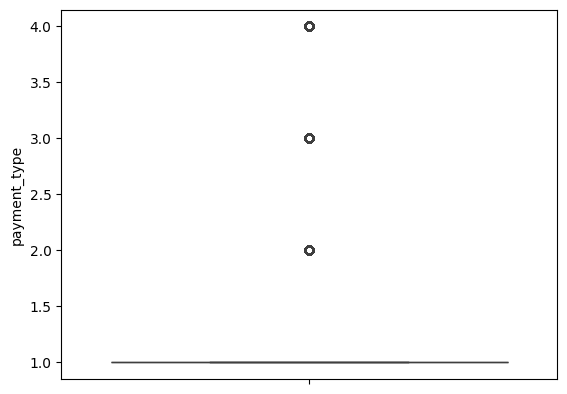

In [199]:
#boxplot for trip_distance
sns.boxplot(df_sampled['payment_type'])
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [31]:
# remove passenger_count > 6
df_sampled = df_sampled[df_sampled['passenger_count'] <= 6]
df_sampled.shape

(1896374, 20)

In [32]:
# Continue with outlier handling
fareamount_outliers =  df_sampled[(df_sampled['trip_distance'] < 1) & (df_sampled['fare_amount'] > 300)]
df_sampled = df_sampled.drop(fareamount_outliers.index)  
df_sampled.shape

(1896317, 20)

In [33]:
#check for the outliers with fare_amount =0 and PULocationID != DOLocationID
location_outliers = df_sampled[(df_sampled['fare_amount'] == 0) & (df_sampled['PULocationID'] != df_sampled['DOLocationID'])]
df_sampled = df_sampled.drop(location_outliers.index)  
df_sampled.shape

(1896046, 20)

In [34]:
#check for the records with tripdistance > 250
tripdistance_outliers = df_sampled[df_sampled['trip_distance'] > 250]
df_sampled = df_sampled.drop(tripdistance_outliers.index)
df_sampled.shape

(1895999, 20)

In [35]:
# Check for the records with payment type is 0
paymenttype_outliers = df_sampled[df_sampled['payment_type'] == 0]
df_sampled = df_sampled.drop(paymenttype_outliers.index)
df_sampled.shape

(1830486, 20)

In [ ]:
# Do any columns need standardising?


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [36]:
df_sampled.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'pickup_date',
 'pickup_hour']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Categorical
* `DOLocationID`: Categorical
* `payment_type`: Categorical
* `pickup_hour`: Categorical
* `trip_duration`: Numerical


The following monetary parameters belong in the same category, is it categorical or numerical? <b>`numerical`<b>


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

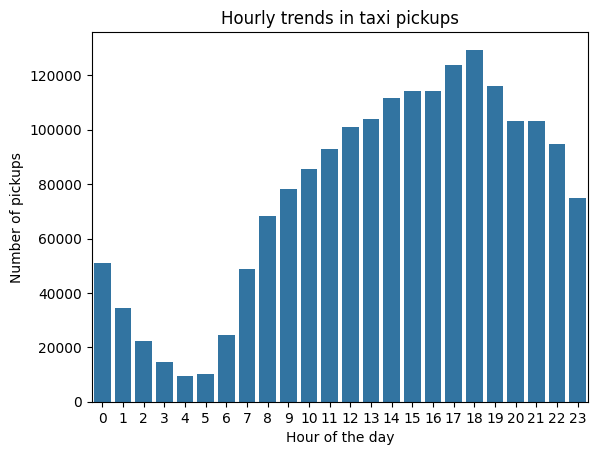

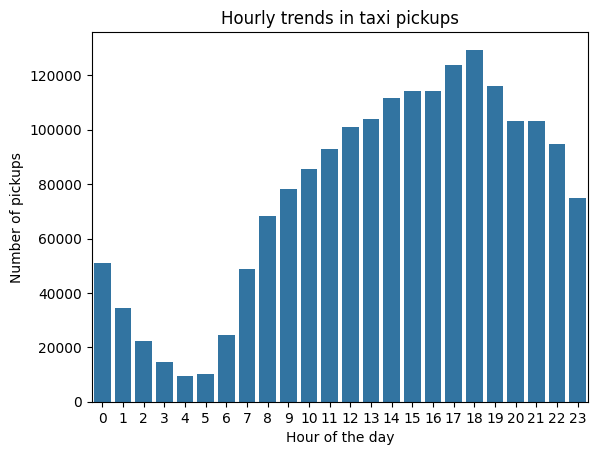

In [ ]:
# Find and show the hourly trends in taxi pickups
hourly_trends = df_sampled.groupby('pickup_hour').size()
sns.barplot(x=hourly_trends.index, y=hourly_trends.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of pickups')
plt.title('Hourly trends in taxi pickups')
plt.show()


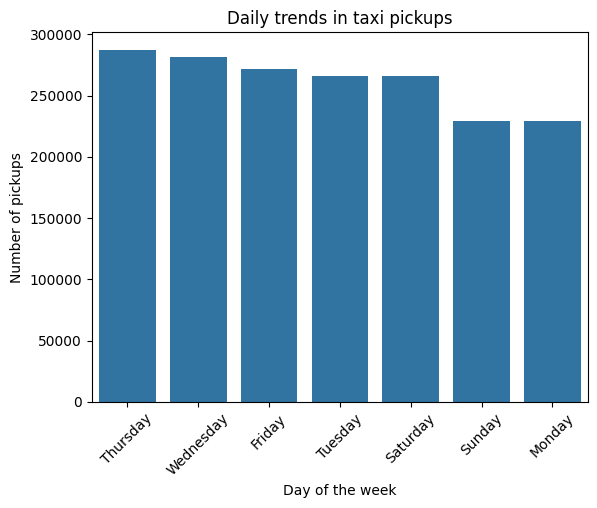

In [479]:
# Find and show the daily trends in taxi pickups (days of the week)
df_sampled['pickup_day'] = df_sampled['tpep_pickup_datetime'].dt.day_name()
daily_trends = df_sampled.groupby('pickup_day').size()
daily_trends.sort_values(ascending=False, inplace=True)
sns.barplot(x=daily_trends.index, y=daily_trends.values)
plt.xlabel('Day of the week')
plt.ylabel('Number of pickups')
plt.title('Daily trends in taxi pickups')
plt.xticks(rotation=45)
plt.show()



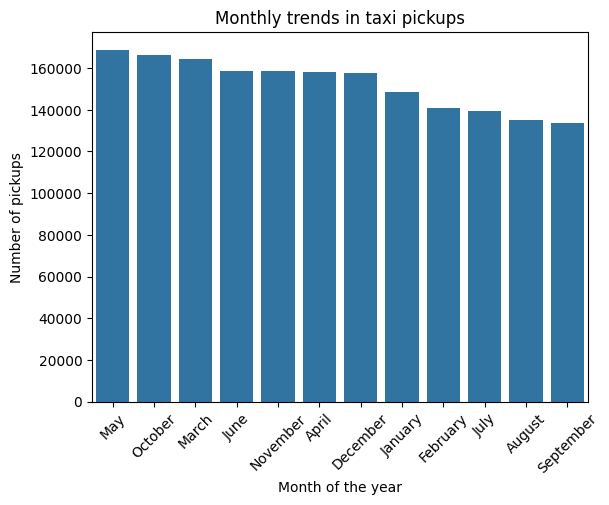

In [480]:
# Show the monthly trends in pickups
df_sampled['pickup_month'] = df_sampled['tpep_pickup_datetime'].dt.month_name()
monthly_trends = df_sampled.groupby('pickup_month').size()
monthly_trends.sort_values(ascending=False, inplace=True)
sns.barplot(x=monthly_trends.index, y=monthly_trends.values)
plt.xlabel('Month of the year')
plt.ylabel('Number of pickups')
plt.tick_params(axis='x', rotation=45)
plt.title('Monthly trends in taxi pickups')
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [78]:
# Analyse the above parameters
#zero/ negative fare amount
df_sampled [df_sampled['fare_amount'] <= 0].shape


(370, 23)

In [77]:
#zero/ negative tip amount
df_sampled [df_sampled['tip_amount'] <= 0].shape


(408764, 23)

In [ ]:
#zero/ negative total amount
df_sampled [df_sampled['total_amount'] <= 0].shape

(197, 23)

In [80]:
#zero/ negative trip distance
df_sampled [df_sampled['trip_distance'] <= 0].shape

(21727, 23)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

Yes as fare_amount, total_amount columns contains 0 values which are not valid for this case, however trip_distance contains 0 values are valid in scenarios where the pick and drop zones are same. and tip_amount is also optional and should not be always grather than 0, so ignoring the 0 in tip_amount column

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?
No as 0 is valid for many cases with same pickup and drop locations for the ride we can ignore the distance columns with 0's

In [82]:
# Create a df with non zero entries for the selected parameters.
nonzero_sampled_df = df_sampled[(df_sampled['fare_amount'] > 0) & (df_sampled['total_amount'] > 0)]
nonzero_sampled_df.shape


(1830116, 23)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

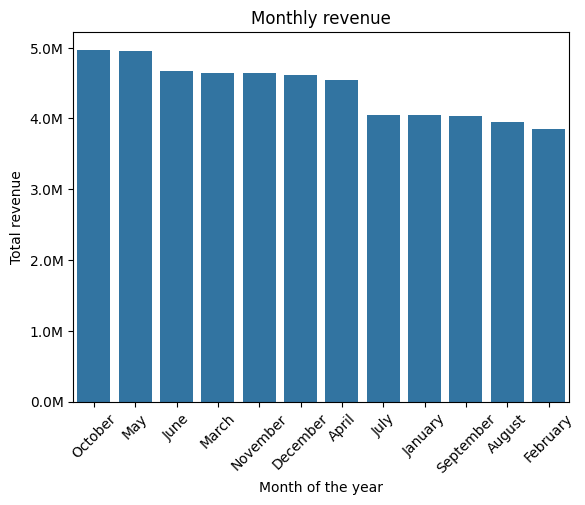

In [ ]:
# Group data by month and analyse monthly revenue
monthly_revenue = nonzero_sampled_df.groupby('pickup_month')['total_amount'].sum()
monthly_revenue = monthly_revenue.sort_values(ascending=False)
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xlabel('Month of the year')
plt.ylabel('Total revenue')
ticks = np.arange(0, 6000000, 1000000)
labels =["{}M".format(i/1000000) for i in ticks]
plt.xticks(rotation=45)
plt.yticks(ticks, labels)
plt.title('Monthly revenue')
plt.show()




**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [103]:
nonzero_sampled_df['pickup_month'].head()

0    December
1     January
2     January
3     January
4     January
Name: pickup_month, dtype: object

In [ ]:
# Calculate proportion of each quarter
quarterly_revenue = nonzero_sampled_df.groupby(pd.PeriodIndex(nonzero_sampled_df['pickup_month'], freq='Q'))['total_amount'].sum()
quarterly_revenue = quarterly_revenue / quarterly_revenue.sum()
quarterly_revenue


pickup_month
1Q1    0.236709
1Q2    0.267368
1Q3    0.227346
1Q4    0.268576
Freq: Q-DEC, Name: total_amount, dtype: float64

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [122]:
# corr= nonzero_sampled_df[nonzero_sampled_df['trip_distance'] > 0]['trip_distance'].corr(nonzero_sampled_df[nonzero_sampled_df['trip_distance'] > 0]['fare_amount'])
newdf = nonzero_sampled_df[nonzero_sampled_df['trip_distance'] > 0]
newdf = newdf[['trip_distance','fare_amount']]

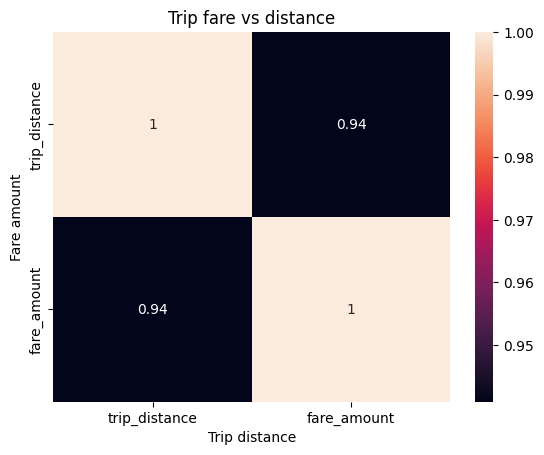

In [127]:
# Show how trip fare is affected by distance
# corr= nonzero_sampled_df[nonzero_sampled_df['trip_distance'] > 0]['trip_distance'].corr(nonzero_sampled_df[nonzero_sampled_df['trip_distance'] > 0]['fare_amount'])
# df_corr = nonzero_sampled_df[nonzero_sampled_df[nonzero_sampled_df['trip_distance'] > 0]]['trip_disance', 'fare_amount']
sns.heatmap(newdf.corr(), annot=True)
plt.xlabel('Trip distance')
plt.ylabel('Fare amount')
plt.title('Trip fare vs distance')
plt.show()



**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

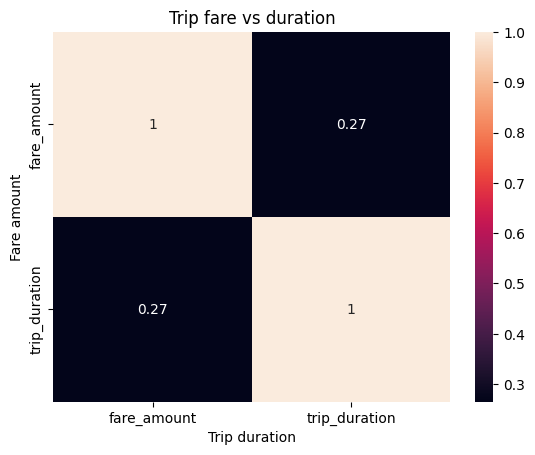

In [128]:
# Show relationship between fare and trip duration
# Create a new column for trip duration
nonzero_sampled_df['trip_duration'] = (nonzero_sampled_df['tpep_dropoff_datetime'] - nonzero_sampled_df['tpep_pickup_datetime']).dt.seconds
# Show how trip fare is affected by distance
sns.heatmap(nonzero_sampled_df[['fare_amount','trip_duration']].corr(), annot=True)
plt.xlabel('Trip duration')
plt.ylabel('Fare amount')
plt.title('Trip fare vs duration')
plt.show()




In [ ]:
# Show relationship between fare and number of passengers
# Show how trip fare is affected by distance
sns.heatmap(nonzero_sampled_df[['fare_amount','passenger_count']].corr(), annot=True)
plt.xlabel('Number of passengers')
plt.ylabel('Fare amount')
plt.title('Trip fare vs number of passengers')
plt.show()


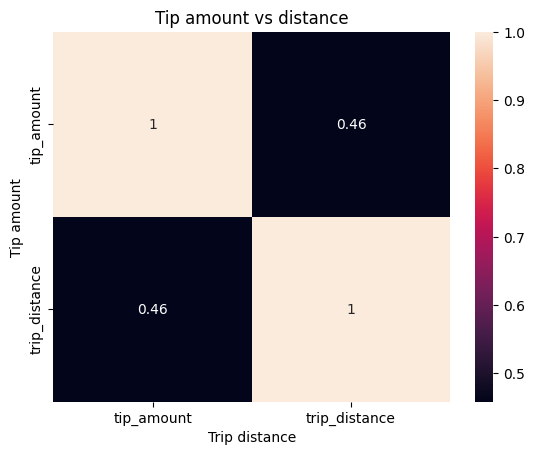

In [129]:
# Show relationship between tip and trip distance
# Show how trip fare is affected by distance
sns.heatmap(nonzero_sampled_df[['tip_amount','trip_distance']].corr(), annot=True)
plt.xlabel('Trip distance')
plt.ylabel('Tip amount')
plt.title('Tip amount vs distance')
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

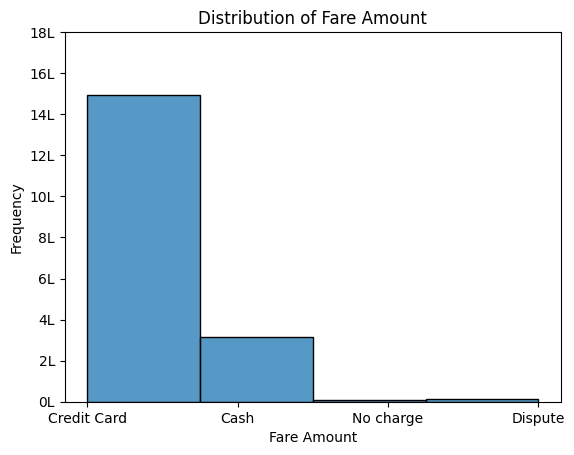

In [176]:
sns.histplot(nonzero_sampled_df['payment_type'], bins=4, kde=False)
ticks = np.arange(0, 2000000, 200000)
labels =["{}L".format(i//100000) for i in ticks]
plt.yticks(ticks, labels) 
plt.xticks((1,2,3,4),['Credit Card', 'Cash', 'No charge', 'Dispute'])
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('Frequency')
plt.show()

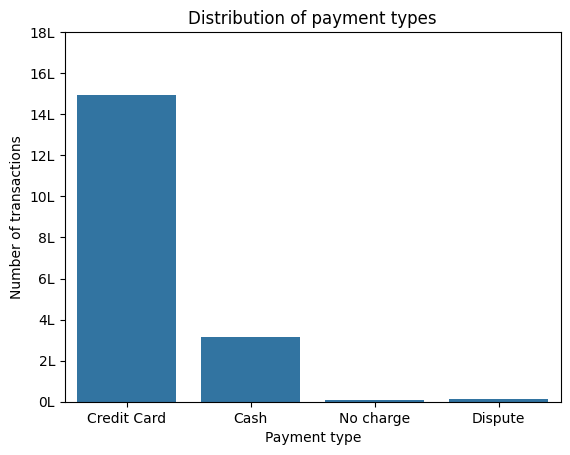

In [173]:
# Analyse the distribution of different payment types (payment_type).
# Show the distribution of payment types
payment_types = nonzero_sampled_df['payment_type'].value_counts()
sns.barplot(x=payment_types.index, y=payment_types.values)
ticks = np.arange(0, 2000000, 200000)
labels =["{}L".format(i//100000) for i in ticks]
plt.yticks(ticks, labels) 
plt.xticks((0,1,2,3),['Credit Card', 'Cash', 'No charge', 'Dispute'])
plt.xlabel('Payment type')
plt.ylabel('Number of transactions')
plt.title('Distribution of payment types')
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [178]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('taxi_zones/taxi_zones.shp') # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

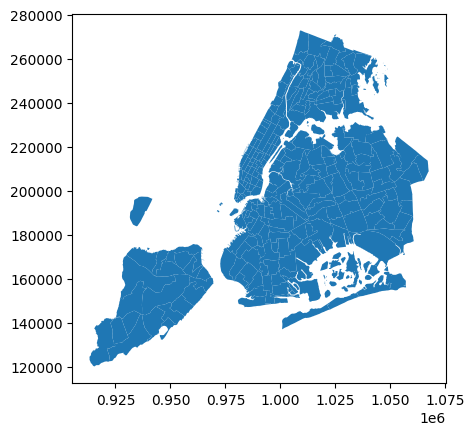

In [179]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [180]:
# Merge zones and trip records using locationID and PULocationID
# Merge the two dataframes
merged_df = pd.merge(nonzero_sampled_df, zones, left_on='PULocationID', right_on='LocationID', how='left')
merged_df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0       2.0  2022-12-31 23:59:37   2023-01-01 00:07:28              1.0   
1       1.0  2023-01-01 00:34:52   2023-01-01 00:44:07              1.0   
2       2.0  2023-01-01 00:54:18   2023-01-01 01:24:33              2.0   
3       1.0  2023-01-01 00:45:20   2023-01-01 00:56:03              1.0   
4       2.0  2023-01-01 00:46:18   2023-01-01 00:54:19              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.38         1.0         142.0         151.0           1.0   
1           1.00        99.0          42.0          74.0           1.0   
2           3.30         1.0         234.0         142.0           1.0   
3           1.60         3.0         246.0         249.0           1.0   
4           1.42         1.0         239.0          50.0           1.0   

   fare_amount  ...  pickup_month  pickup_month_Num  trip_duration  OBJECTID  \
0         12.1  ...      December                12            471     142.0   
1         12.2  ...       January                 1            555      42.0   
2         26.8  ...       January                 1           1815     234.0   
3         30.0  ...       January                 1            643     246.0   
4         10.0  ...       January                 1            481     239.0   

   Shape_Leng  Shape_Area                       zone  LocationID    borough  \
0    0.038176    0.000076        Lincoln Square East       142.0  Manhattan   
1    0.092709    0.000264       Central Harlem North        42.0  Manhattan   
2    0.036072    0.000073                   Union Sq       234.0  Manhattan   
3    0.069467    0.000281  West Chelsea/Hudson Yards       246.0  Manhattan   
4    0.063626    0.000205      Upper West Side South       239.0  Manhattan   

                                            geometry  
0  POLYGON ((989380.305 218980.247, 989359.803 21...  
1  POLYGON ((1002413.191 243934.56, 1002388.021 2...  
2  POLYGON ((987029.847 207022.299, 987048.27 206...  
3  POLYGON ((983031.177 217138.506, 983640.32 216...  
4  POLYGON ((991168.979 226252.992, 991955.565 22...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [200]:
# Group data by location and calculate the number of trips
location_trends = merged_df.groupby('zone').size().to_frame('no.of_trips')
location_trends = location_trends.sort_values(by='no.of_trips', ascending=False)
# location_trends = location_trends.sort_values(ascending=False)
location_trends



no.of_trips
zone                                  
JFK Airport                      96903
Upper East Side South            86585
Midtown Center                   85969
Upper East Side North            76948
Midtown East                     66339
...                                ...
Forest Park/Highland Park            1
Grymes Hill/Clifton                  1
Oakwood                              1
Stapleton                            1
Rossville/Woodrow                    1

[250 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [193]:
# Merge trip counts back to the zones GeoDataFrame
# Merge the two dataframes
zones_with_loctrends = pd.merge(zones, location_trends, left_on='zone', right_on='zone', how='left')
zones_with_loctrends.head()




OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   no.of_trips  
0        222.0  
1          3.0  
2         39.0  
3       1873.0  
4         18.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

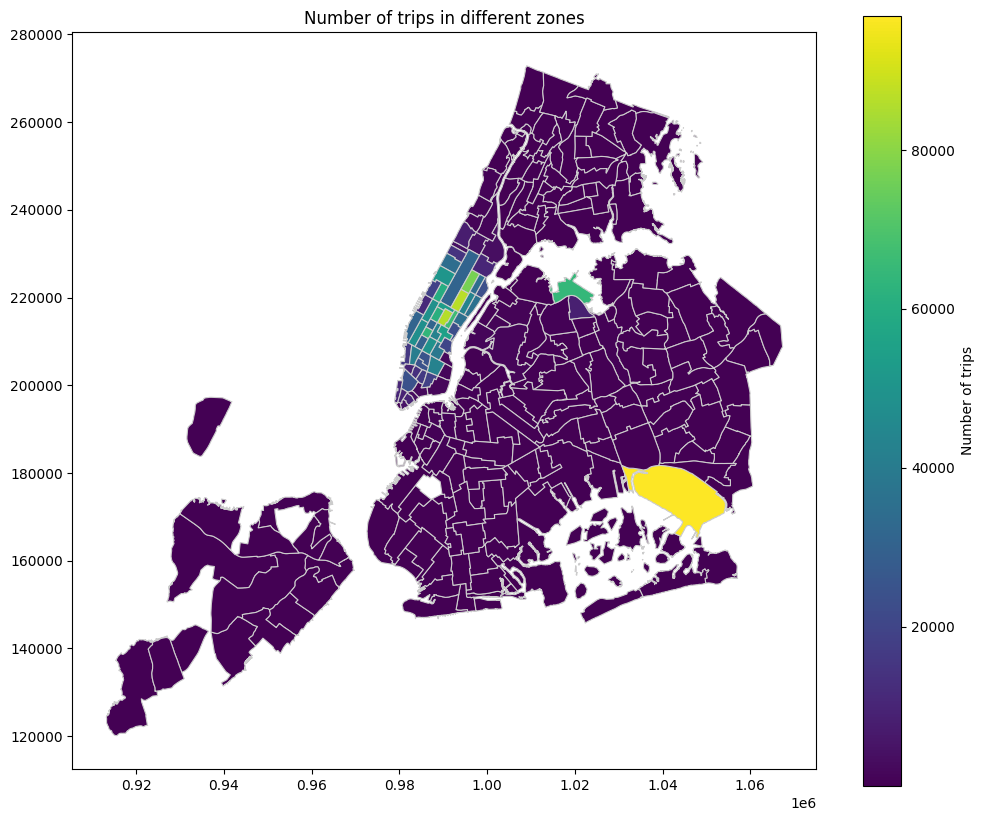

In [373]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))



# Plot the map and display it
zones_with_loctrends.plot(column='no.of_trips',  linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, legend_kwds={'label': "Number of trips",'orientation':"vertical"})
plt.title('Number of trips in different zones')
plt.show()



In [374]:
# can you try displaying the zones DF sorted by the number of trips?
zones_with_loctrends.sort_values(by='no.of_trips', ascending=False)




OBJECTID  Shape_Leng  Shape_Area                   zone  LocationID  \
131       132    0.245479    0.002038            JFK Airport         132   
236       237    0.042213    0.000096  Upper East Side South         237   
160       161    0.035804    0.000072         Midtown Center         161   
235       236    0.044252    0.000103  Upper East Side North         236   
161       162    0.035270    0.000048           Midtown East         162   
..        ...         ...         ...                    ...         ...   
109       110    0.103946    0.000526       Great Kills Park         110   
110       111    0.059931    0.000209    Green-Wood Cemetery         111   
186       187    0.126868    0.000421          Port Richmond         187   
198       199    0.077809    0.000289          Rikers Island         199   
244       245    0.095983    0.000466          West Brighton         245   

           borough                                           geometry  \
131         Queens  MULTIPOLYGON (((1032791.001 181085.006, 103283...   
236      Manhattan  POLYGON ((993633.442 216961.016, 993507.232 21...   
160      Manhattan  POLYGON ((991081.026 214453.698, 990952.644 21...   
235      Manhattan  POLYGON ((995940.048 221122.92, 995812.322 220...   
161      Manhattan  POLYGON ((992224.354 214415.293, 992096.999 21...   
..             ...                                                ...   
109  Staten Island  POLYGON ((951420.092 139894.411, 951856.209 13...   
110       Brooklyn  POLYGON ((985590.381 179611.82, 986202.162 179...   
186  Staten Island  MULTIPOLYGON (((946964.115 173161.64, 946977.8...   
198          Bronx  POLYGON ((1015023.713 230286.759, 1015093.307 ...   
244  Staten Island  POLYGON ((957085.564 172591.26, 957142.385 172...   

     no.of_trips  
131      96903.0  
236      86585.0  
160      85969.0  
235      76948.0  
161      66339.0  
..           ...  
109          NaN  
110          NaN  
186          NaN  
198          NaN  
244          NaN  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [235]:
# find trip_distance and trip_duration for the records with PULocationID = 264 and DOLocationID = 264
# remove the records with 0 in trip_distance and trip_duration
df_zero_records = nonzero_sampled_df[(nonzero_sampled_df['trip_distance'] > 0) & (nonzero_sampled_df['trip_duration'] > 0)]
df_zero_records[['trip_distance', 'trip_duration']]


trip_distance  trip_duration
0                 2.38            471
1                 1.00            555
2                 3.30           1815
3                 1.60            643
4                 1.42            481
...                ...            ...
1896394          21.22           2839
1896395           3.78            884
1896396           0.99            461
1896398           5.10           1518
1896399           1.90            423

[1808590 rows x 2 columns]

In [239]:
# Find routes which have the slowest speeds at different times of the day
# Calculate speed for each trip
df_zero_records['speed'] = df_zero_records['trip_distance'] / (df_zero_records['trip_duration']/3600) # convert seconds to hours
# Find the slowest routes
slowest_routes = df_zero_records.groupby(['pickup_hour', 'PULocationID', 'DOLocationID'])['speed'].mean()
slowest_routes = slowest_routes.sort_values().reset_index()
slowest_routes



pickup_hour  PULocationID  DOLocationID         speed
0                12         207.0         226.0      0.000420
1                13         215.0         132.0      0.005312
2                23         127.0         243.0      0.014634
3                 9         224.0         224.0      0.033488
4                16         264.0          39.0      0.034253
...             ...           ...           ...           ...
127420           16         213.0         213.0   8856.000000
127421           22         130.0         130.0  12960.000000
127422           23         201.0         201.0  22770.000000
127423           10         112.0         112.0  24045.000000
127424            8           1.0           1.0  28993.699789

[127425 rows x 4 columns]

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

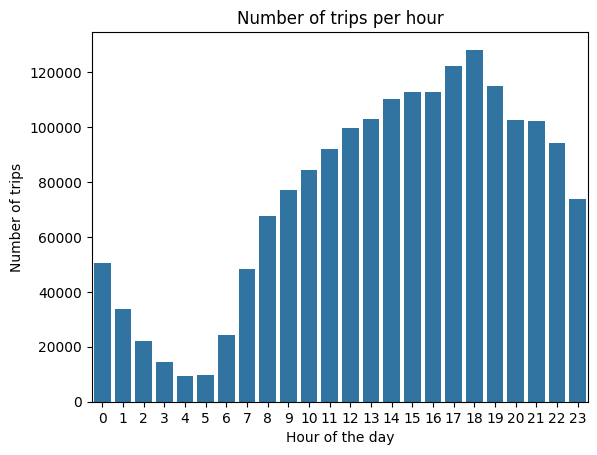

The busiest hour is 18 (6 PM)


In [375]:
# Visualise the number of trips per hour and find the busiest hour

# Visualise the number of trips per hour
hourly_trips = df_zero_records.groupby('pickup_hour').size()
sns.barplot(x=hourly_trips.index, y=hourly_trips.values)
plt.xlabel('Hour of the day')
plt.ylabel('Number of trips')
plt.title('Number of trips per hour')
plt.show()

print(f"The busiest hour is 18 (6 PM)")



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# we took a fraction of trips, To find actual number we need to scale the number up by the sampling ratio

# Calculate the actual number of trips
actual_trips = location_trends['no.of_trips'] * 20
actual_trips.sort_values(ascending=False)
actual_trips

# this is the actual number of trips in each zone, considered *20 on no.of trips calulated as we took 5% of the data

pickup_hour
0      50336
1      33763
2      22083
3      14332
4       9202
5       9793
6      24198
7      48312
8      67453
9      77229
10     84368
11     91937
12     99543
13    102736
14    110173
15    112783
16    112681
17    122274
18    128108
19    114820
20    102387
21    102129
22     94021
23     73929
dtype: int64

In [392]:
# Scale up the number of trips

hourly_trips
# Fill in the value of your sampling fraction and use that to scale up the numbers
sampling_fraction = 0.05
actual_trips = hourly_trips / sampling_fraction
actual_trips = actual_trips.to_frame('actual_trips')
actual_trips = actual_trips.sort_values(by='actual_trips', ascending=False)
actual_trips.head() 



actual_trips
pickup_hour              
18              2562160.0
17              2445480.0
19              2296400.0
15              2255660.0
16              2253620.0

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

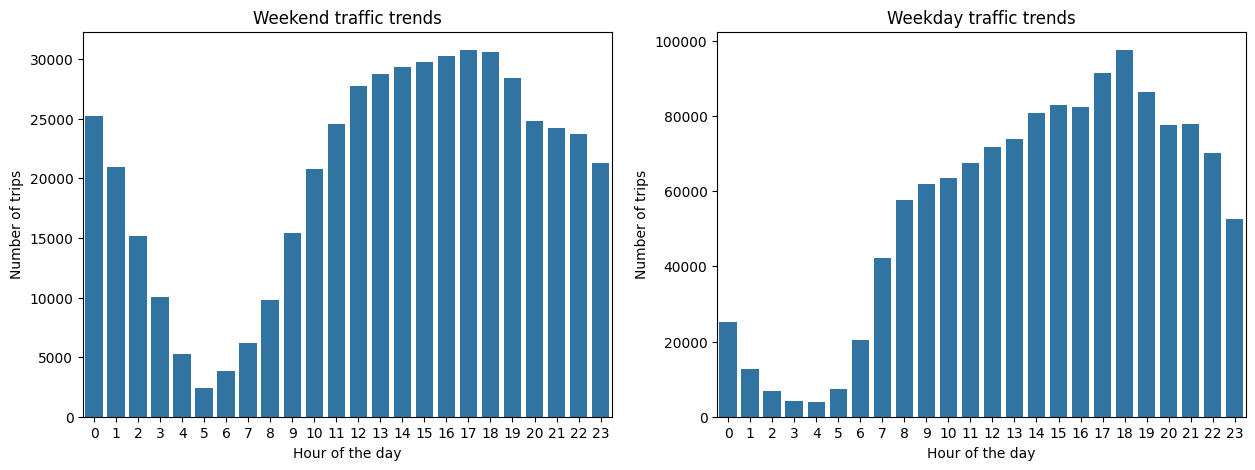

In [254]:
# Compare traffic trends for the week days and weekends
weekend = ['Saturday', 'Sunday']
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekend_traffic = df_zero_records[df_zero_records['pickup_day'].isin(weekend)].groupby('pickup_hour').size()
weekday_traffic = df_zero_records[df_zero_records['pickup_day'].isin(weekdays)].groupby('pickup_hour').size()
# Plot the traffic trends
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=weekend_traffic.index, y=weekend_traffic.values, ax=ax[0])
ax[0].set_xlabel('Hour of the day')
ax[0].set_ylabel('Number of trips')
ax[0].set_title('Weekend traffic trends')
sns.barplot(x=weekday_traffic.index, y=weekday_traffic.values, ax=ax[1])
ax[1].set_xlabel('Hour of the day')
ax[1].set_ylabel('Number of trips')
ax[1].set_title('Weekday traffic trends')
plt.show()




What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Identifying busy and quiet hours for each day provides insights on optimizing operations, improving customer experience, and maximizing revenue.

    - During busy hours, more drivers can be deployed to meet demand, Offering incentives to drivers also helpful to get more drivers.
    - Surge pricing can be implemented during busy hours to increase revenue.
    - Add some offers to customers during quiet hours to attract more customers.
    - Traffic patterns during busy hours can help identify bottlenecks and improve route planning.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [289]:
top_10_pickup_zones = df_zero_records.groupby(['PULocationID','pickup_hour']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset=['PULocationID']).head(10).sort_values(by='count', ascending=False)  
top_10_pickup_zones

PULocationID  pickup_hour  count
0          161.0           18   7439
2          132.0           16   6772
4          237.0           14   6664
7          236.0           15   6494
25         162.0           18   5748
39         138.0           14   4929
41         142.0           21   4839
44         163.0           18   4704
53         230.0           18   4422
61         170.0           18   4255

In [302]:
# Find the top 10 zones with high hourly dropoffs

top_10_dropoff_zones = df_zero_records.groupby(['DOLocationID','pickup_hour']).size().sort_values(ascending=False).reset_index(name='count').drop_duplicates(subset=['DOLocationID']).head(10).sort_values(by='count', ascending=False)
top_10_dropoff_zones

DOLocationID  pickup_hour  count
0          237.0           18   6160
1          236.0           15   6101
13         161.0            8   5307
19         142.0           18   4902
26         230.0           18   4748
35         239.0           18   4185
47         141.0           18   3744
49          48.0           18   3617
50         162.0            9   3614
56         170.0           17   3507

In [255]:
# Find top 10 pickup and dropoff zones
# Find the top 10 zones with high hourly pickups
top_pickup_zones = df_zero_records.groupby('PULocationID').size().nlargest(10)
top_dropoff_zones = df_zero_records.groupby('DOLocationID').size().nlargest(10)
top_pickup_zones
top_dropoff_zones



DOLocationID
236.0    80227
237.0    77665
161.0    71449
230.0    56154
170.0    54117
162.0    52155
142.0    51454
239.0    50455
141.0    48485
68.0     46337
dtype: int64

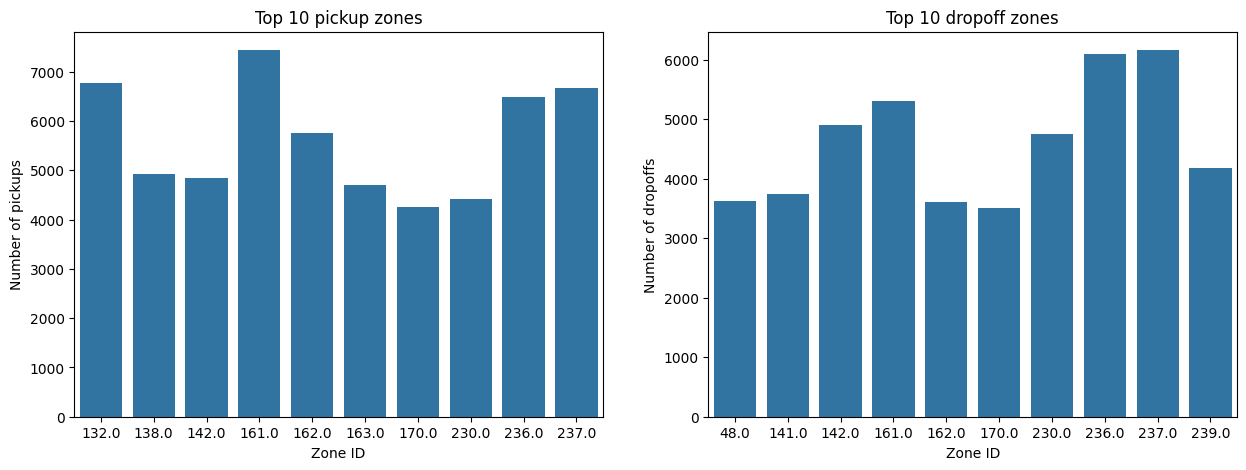

In [301]:
# show pickup and dropoff trends in the top 10 zones
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x=top_10_pickup_zones['PULocationID'], y=top_10_pickup_zones['count'].sort_values(), ax=ax[0])
ax[0].set_xlabel('Zone ID')
ax[0].set_ylabel('Number of pickups')
ax[0].set_title('Top 10 pickup zones')
sns.barplot(x=top_10_dropoff_zones['DOLocationID'], y=top_10_dropoff_zones['count'], ax=ax[1])
ax[1].set_xlabel('Zone ID')
ax[1].set_ylabel('Number of dropoffs')
ax[1].set_title('Top 10 dropoff zones')
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# find number of pickups in eachzone
pickup_zones = df_zero_records.groupby('PULocationID').size().to_frame('no_of_pickups')
pickup_zones = pickup_zones.sort_values(by='no_of_pickups', ascending=False)

# find number of dropoffs in eachzone
dropoff_zones = df_zero_records.groupby('DOLocationID').size().to_frame('no_of_dropoffs')
dropoff_zones = dropoff_zones.sort_values(by='no_of_dropoffs', ascending=False)

# merge the two dataframes
zones_with_trips = pd.merge(pickup_zones, dropoff_zones, left_index=True, right_index=True, how='outer')
#find the ratio of pickups and dropoffs in each zone
zones_with_trips['ratio_trips'] = zones_with_trips['no_of_pickups'] / zones_with_trips['no_of_dropoffs']
zones_with_trips = zones_with_trips.sort_values(by='ratio_trips', ascending=False)
zones_with_trips.head()

no_of_pickups  no_of_dropoffs  ratio_trips
70.0          8409.0             915     9.190164
132.0        95049.0           19922     4.771057
138.0        64032.0           21747     2.944406
186.0        63308.0           39680     1.595464
114.0        24110.0           17405     1.385234

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [413]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
night_hours = df_zero_records[(df_zero_records['pickup_hour'] >= 23) | (df_zero_records['pickup_hour'] <= 5)]
top_night_pickup_zones = night_hours.groupby('PULocationID').size().nlargest(10).to_frame('night_pickup_traffic')

top_night_dropoff_zones = night_hours.groupby('DOLocationID').size().nlargest(10).to_frame('night_dropoff_traffic')
# comined_night_zones = pd.concat([top_night_pickup_zones, top_night_dropoff_zones])
# comined_night_zones
# Note that the top zones should be of night hours and not the overall top zones
# comined_night_zones = pd.merge(top_night_pickup_zones, top_night_dropoff_zones, left_index=True, right_index=True, how='outer')

# comined_night_zones.sort_values(by='night_pickup_traffic', ascending=False)
print(top_night_pickup_zones.head(10))
print(top_night_dropoff_zones.head(10))


              night_pickup_traffic
PULocationID                      
79.0                         15366
132.0                        14585
249.0                        12398
48.0                         10166
148.0                         9706
114.0                         8687
230.0                         8015
186.0                         6894
164.0                         6145
138.0                         6070
              night_dropoff_traffic
DOLocationID                       
79.0                           8151
48.0                           6924
170.0                          6257
68.0                           5815
107.0                          5548
141.0                          5316
263.0                          5121
249.0                          4956
230.0                          4671
229.0                          4349


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [414]:
# Filter for night hours (11 PM to 5 AM)
night_hours = df_zero_records[(df_zero_records['pickup_hour'] >= 23) | (df_zero_records['pickup_hour'] <= 5)]
day_hours = df_zero_records[(df_zero_records['pickup_hour'] > 5) & (df_zero_records['pickup_hour'] < 23)]

# find the revenue share for nighttime and daytime hours
# Calculate the revenue share for nighttime and daytime hours
night_revenue = night_hours.groupby('pickup_hour')['total_amount'].sum()
day_revenue = day_hours.groupby('pickup_hour')['total_amount'].sum()
total_revenue = df_zero_records['total_amount'].sum()
night_revenue_share = night_revenue / total_revenue
day_revenue_share = day_revenue / total_revenue
print('Night Time Revenue Share:' , round(night_revenue_share.sum() * 100, 2) , '%')
print('Day Time Revenue Share:' , round(day_revenue_share.sum() * 100, 2) , '%')




Night Time Revenue Share: 12.02 %
Day Time Revenue Share: 87.98 %


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
# Calculate fare per mile per passenger
df_zero_records['fare_per_mile_per_passenger'] = df_zero_records['fare_amount'] / (df_zero_records['trip_distance'] * df_zero_records['passenger_count'])

df_zero_records[['fare_amount','trip_distance','passenger_count','fare_per_mile_per_passenger']]


fare_amount  trip_distance  passenger_count  \
0               12.1           2.38              1.0   
1               12.2           1.00              1.0   
2               26.8           3.30              2.0   
3               30.0           1.60              1.0   
4               10.0           1.42              1.0   
...              ...            ...              ...   
1896394         70.0          21.22              1.0   
1896395         19.1           3.78              1.0   
1896396          8.6           0.99              1.0   
1896398         28.2           5.10              1.0   
1896399         10.7           1.90              1.0   

         fare_per_mile_per_passenger  
0                           5.084034  
1                          12.200000  
2                           4.060606  
3                          18.750000  
4                           7.042254  
...                              ...  
1896394                     3.298775  
1896395                     5.052910  
1896396                     8.686869  
1896398                     5.529412  
1896399                     5.631579  

[1808590 rows x 4 columns]

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [416]:
df_zero_records[['fare_amount','trip_distance','passenger_count','fare_per_mile','fare_per_mile_per_passenger']]


fare_amount  trip_distance  passenger_count  fare_per_mile  \
0               12.1           2.38              1.0       5.084034   
1               12.2           1.00              1.0      12.200000   
2               26.8           3.30              2.0       8.121212   
3               30.0           1.60              1.0      18.750000   
4               10.0           1.42              1.0       7.042254   
...              ...            ...              ...            ...   
1896394         70.0          21.22              1.0       3.298775   
1896395         19.1           3.78              1.0       5.052910   
1896396          8.6           0.99              1.0       8.686869   
1896398         28.2           5.10              1.0       5.529412   
1896399         10.7           1.90              1.0       5.631579   

         fare_per_mile_per_passenger  
0                           5.084034  
1                          12.200000  
2                           4.060606  
3                          18.750000  
4                           7.042254  
...                              ...  
1896394                     3.298775  
1896395                     5.052910  
1896396                     8.686869  
1896398                     5.529412  
1896399                     5.631579  

[1808590 rows x 5 columns]

In [415]:
# Compare the average fare per mile for different days and for different times of the day
# Calculate the average fare per mile for different days and times of the day
df_zero_records['fare_per_mile'] = df_zero_records['fare_amount'] / df_zero_records['trip_distance']

fare_per_mile_per_day = df_zero_records.groupby('pickup_day')['fare_per_mile'].mean()
fare_per_mile_per_hour = df_zero_records.groupby('pickup_hour')['fare_per_mile'].mean()
print(fare_per_mile_per_day)
print(fare_per_mile_per_hour)




pickup_day
Friday       11.490383
Monday       10.740960
Saturday     11.040050
Sunday       11.427714
Thursday     11.336343
Tuesday      10.979783
Wednesday    10.835823
Name: fare_per_mile, dtype: float64
pickup_hour
0     10.304874
1     11.601680
2     10.068029
3     11.065297
4     14.543874
5     13.438226
6     11.055111
7      9.959964
8     10.774190
9      9.863084
10    11.087487
11    11.456487
12    11.155293
13    11.546507
14    12.242708
15    12.254056
16    12.797342
17    11.921108
18    11.141723
19    11.101313
20    10.291084
21     9.471646
22    10.021466
23    10.069978
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [417]:
# Compare fare per mile for different vendors
# Calculate the average fare per mile for different vendors
fare_per_mile_per_vendor = df_zero_records.groupby('VendorID')['fare_per_mile'].mean()
fare_per_mile_per_vendor


VendorID
1.0     8.109159
2.0    12.178093
Name: fare_per_mile, dtype: float64

<Axes: xlabel='VendorID'>

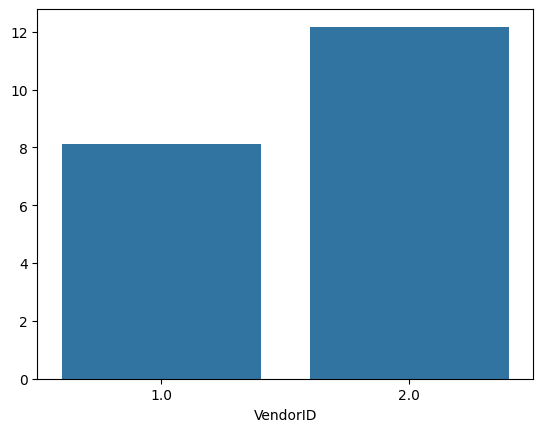

In [418]:
sns.barplot(x=fare_per_mile_per_vendor.index, y=fare_per_mile_per_vendor.values)

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [421]:
df_zero_records['distance_tier']


0          2-5 miles
1          0-2 miles
2          2-5 miles
3          0-2 miles
4          0-2 miles
             ...    
1896394     5+ miles
1896395    2-5 miles
1896396    0-2 miles
1896398     5+ miles
1896399    0-2 miles
Name: distance_tier, Length: 1808590, dtype: category
Categories (3, object): ['0-2 miles' < '2-5 miles' < '5+ miles']

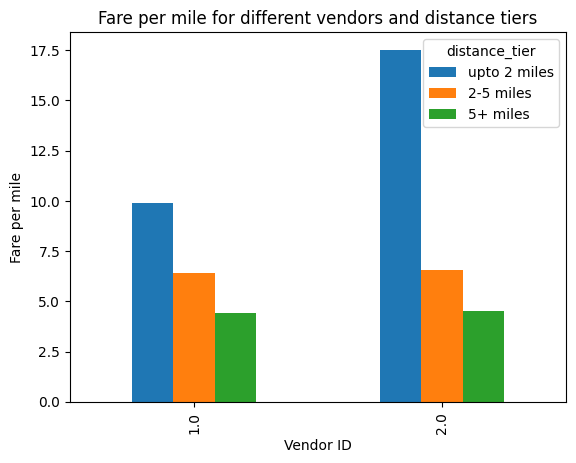

In [433]:
# Defining distance tiers
# compare the fare of different venords for distances upto 2miles, 2-5 miles and above 5 miles
# Define distance tiers
df_zero_records['distance_tier'] = pd.cut(df_zero_records['trip_distance'], bins=[0, 2, 5, 1000], labels=['upto 2 miles', '2-5 miles', '5+ miles'])

# Calculate the average fare per mile for different vendors and distance tiers
fare_per_mile_per_vendor_distance = df_zero_records.groupby(['VendorID','distance_tier'])['fare_per_mile'].mean()
fare_per_mile_per_vendor_distance

# visualize the fare per mile for different vendors and distance tiers
# Plot the average fare per mile for different vendors and distance tiers
fare_per_mile_per_vendor_distance.unstack().plot(kind='bar')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per mile')
plt.title('Fare per mile for different vendors and distance tiers')
plt.show()




##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [435]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Calculate tip percentage
df_zero_records['tip_percentage'] = (df_zero_records['tip_amount'] / df_zero_records['total_amount']) * 100

# Calculate average tip percentage for different distances, passenger counts and pickup times
tip_percentage_distance = df_zero_records.groupby('trip_distance')['tip_percentage'].mean()
tip_percentage_passenger = df_zero_records.groupby('passenger_count')['tip_percentage'].mean()
tip_percentage_hour = df_zero_records.groupby('pickup_hour')['tip_percentage'].mean()
print(tip_percentage_distance)
print(tip_percentage_passenger)
print(tip_percentage_hour)



trip_distance
0.01      3.779030
0.02      2.838785
0.03      3.125577
0.04      3.355883
0.05      5.547090
            ...   
156.23    0.000000
171.50    0.000000
182.09    0.000000
235.36    0.000000
249.63    0.000000
Name: tip_percentage, Length: 4114, dtype: float64
passenger_count
1.0    12.159455
2.0    11.798270
3.0    11.351136
4.0    10.454719
5.0    12.111890
6.0    12.199618
Name: tip_percentage, dtype: float64
pickup_hour
0     11.992721
1     11.973980
2     11.789605
3     11.399732
4     10.385918
5     10.161679
6     11.020859
7     12.002353
8     12.290364
9     12.027849
10    11.884490
11    11.783809
12    11.754066
13    11.747041
14    11.789978
15    11.861109
16    11.787427
17    12.103111
18    12.315035
19    12.243104
20    12.498691
21    12.627267
22    12.530239
23    12.205288
Name: tip_percentage, dtype: float64


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [438]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Find trips with tip percentage < 10% and > 25%
low_tip_trips = df_zero_records[df_zero_records['tip_percentage'] < 10]
high_tip_trips = df_zero_records[df_zero_records['tip_percentage'] > 25]




**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days
# Calculate average passenger count for different hours and days
passenger_count_hour = df_zero_records.groupby('pickup_hour')['passenger_count'].size()
passenger_count_day = df_zero_records.groupby('pickup_day')['passenger_count'].size()
print(passenger_count_hour)
print(passenger_count_day)

pickup_hour
0      50336
1      33763
2      22083
3      14332
4       9202
5       9793
6      24198
7      48312
8      67453
9      77229
10     84368
11     91937
12     99543
13    102736
14    110173
15    112783
16    112681
17    122274
18    128108
19    114820
20    102387
21    102129
22     94021
23     73929
Name: passenger_count, dtype: int64
pickup_day
Friday       268274
Monday       225736
Saturday     262625
Sunday       226729
Thursday     283906
Tuesday      262862
Wednesday    278458
Name: passenger_count, dtype: int64


<Axes: xlabel='pickup_hour'>

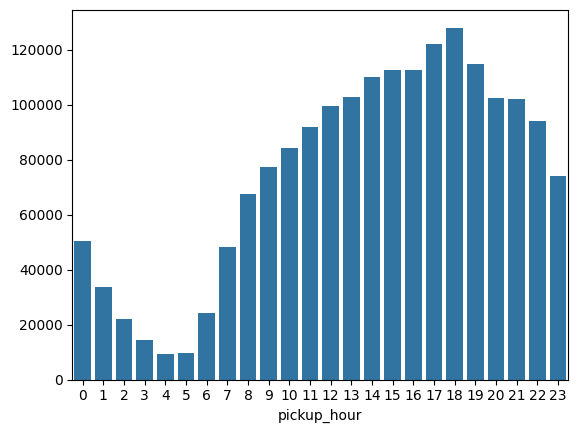

In [448]:
# passenger count by hour
sns.barplot(x=passenger_count_hour.index, y=passenger_count_hour.values)


<Axes: xlabel='pickup_day'>

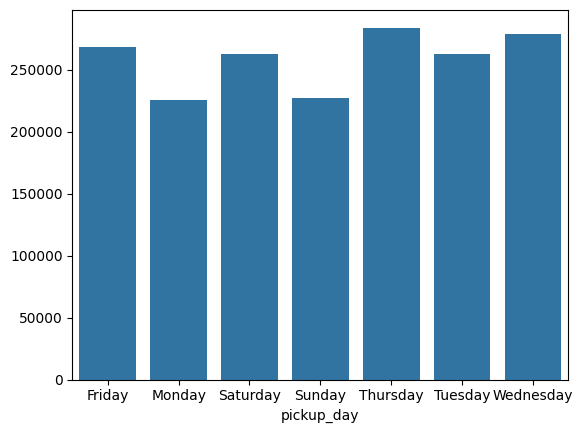

In [447]:
# passenger count by day
sns.barplot(x=passenger_count_day.index, y=passenger_count_day.values)


**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones
# Calculate average passenger count for different zones
passenger_count_zone = df_zero_records.groupby('PULocationID')['passenger_count'].size()
passenger_count_zone

PULocationID
1.0         36
2.0          3
3.0         35
4.0       1829
5.0         17
         ...  
261.0     9323
262.0    23517
263.0    34191
264.0    15756
265.0      315
Name: passenger_count, Length: 252, dtype: int64

In [452]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_loctrends['avg_passenger_count'] = df_zero_records.groupby('PULocationID')['passenger_count'].mean()
zones_with_loctrends = zones_with_loctrends.sort_values(by='avg_passenger_count', ascending=False)
zones_with_loctrends.head()



OBJECTID  Shape_Leng  Shape_Area               zone  LocationID  \
8           9    0.099784    0.000338         Auburndale           9   
204       205    0.141953    0.000766       Saint Albans         205   
172       173    0.060064    0.000178       North Corona         173   
6           7    0.107417    0.000390            Astoria           7   
12         13    0.050281    0.000149  Battery Park City          13   

       borough                                           geometry  \
8       Queens  POLYGON ((1043803.993 216615.925, 1043849.708 ...   
204     Queens  POLYGON ((1049028.76 195325.647, 1049096.735 1...   
172     Queens  POLYGON ((1024308.689 215593.594, 1024336.88 2...   
6       Queens  POLYGON ((1010804.218 218919.641, 1011049.165 ...   
12   Manhattan  POLYGON ((980801.31 201248.869, 980697.386 200...   

     no.of_trips  avg_passenger_count  
8           28.0             2.000000  
204        161.0             2.000000  
172         40.0             2.000000  
6          793.0             1.789474  
12       10529.0             1.717277

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [477]:
# How often is each surcharge applied?
extra_charges =  df_zero_records[(df_zero_records['extra'] > 0)]
surcharge_frequency = extra_charges.groupby('pickup_hour')['extra'].size().to_frame('surcharge_frequency')
surcharge_frequency.sort_values(by='surcharge_frequency', ascending=False)


surcharge_frequency
pickup_hour                     
18                        103509
21                         98895
20                         97807
17                         97693
19                         92144
22                         90759
16                         85805
23                         71115
0                          48667
15                         34632
14                         33628
1                          32883
13                         31508
12                         30338
11                         27942
10                         26265
9                          23775
2                          21737
8                          20069
7                          14621
3                          14011
4                           8469
5                           8369
6                           8060

In [476]:
df_zero_records[(df_zero_records['PULocationID']  == 132.0) & (df_zero_records['extra'] > 0)]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
53            2.0  2023-01-01 00:13:43   2023-01-01 00:59:42              1.0   
137           2.0  2023-01-01 00:15:06   2023-01-01 00:28:58              1.0   
221           2.0  2023-01-01 00:34:47   2023-01-01 00:49:05              1.0   
228           1.0  2023-01-01 00:15:05   2023-01-01 00:44:14              2.0   
272           2.0  2023-01-01 01:28:03   2023-01-01 01:52:36              1.0   
...           ...                  ...                   ...              ...   
1896268       2.0  2023-09-30 23:28:14   2023-10-01 00:14:05              1.0   
1896290       1.0  2023-09-30 23:59:36   2023-10-01 00:10:47              1.0   
1896296       2.0  2023-09-30 23:14:48   2023-09-30 23:23:48              1.0   
1896298       2.0  2023-09-30 23:51:56   2023-10-01 00:15:15              1.0   
1896344       2.0  2023-09-30 23:05:35   2023-09-30 23:27:59              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
53               28.94         1.0         132.0         251.0           1.0   
137               7.51         1.0         132.0         139.0           1.0   
221               4.67         1.0         132.0         218.0           1.0   
228               9.90         1.0         132.0         188.0           2.0   
272              15.15         1.0         132.0           7.0           1.0   
...                ...         ...           ...           ...           ...   
1896268          15.06         1.0         132.0          25.0           1.0   
1896290           7.60         1.0         132.0         222.0           2.0   
1896296           5.06         1.0         132.0         203.0           1.0   
1896298          15.79         1.0         132.0          55.0           2.0   
1896344          13.21         1.0         132.0         175.0           1.0   

         fare_amount  ...  pickup_hour  pickup_day  pickup_month  \
53             108.0  ...            0      Sunday       January   
137             30.3  ...            0      Sunday       January   
221             22.6  ...            0      Sunday       January   
228             42.9  ...            0      Sunday       January   
272             59.0  ...            1      Sunday       January   
...              ...  ...          ...         ...           ...   
1896268         63.2  ...           23    Saturday     September   
1896290         29.6  ...           23    Saturday     September   
1896296         20.5  ...           23    Saturday     September   
1896298         60.4  ...           23    Saturday     September   
1896344         49.9  ...           23    Saturday     September   

         pickup_month_Num  trip_duration      speed  \
53                      1           2759  37.761508   
137                     1            832  32.495192   
221                     1            858  19.594406   
228                     1           1749  20.377358   
272                     1           1473  37.026477   
...                   ...            ...        ...   
1896268                 9           2751  19.707743   
1896290                 9            671  40.774963   
1896296                 9            540  33.733333   
1896298                 9           1399  40.631880   
1896344                 9           1344  35.383929   

         fare_per_mile_per_passenger  distance_tier fare_per_mile  \
53                          3.731859       5+ miles      3.731859   
137                         4.034621       5+ miles      4.034621   
221                         4.839400      2-5 miles      4.839400   
228                         2.166667       5+ miles      4.333333   
272                         3.894389       5+ miles      3.894389   
...                              ...            ...           ...   
1896268                     4.196547       5+ miles      4.196547   
1896290                     3.894737       5+

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

In [ ]:
# Based on the data analysis, the busiest hours are between 17:00 and 19:00.
# Deploy more vehicles during these hours to meet demand and reduce wait times.
# Analysis with zones data indicates the highest traffic based on the zones.
# Ensure sufficient vehicle availability in these zones, especially during peak hours.
# The slowest_routes data shows routes with low average speeds.
# Optimize these routes by analyzing traffic patterns and suggesting alternate paths.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

In [ ]:
# Based on the top_pickup_zones df and top_dropoff_zones df, ensure sufficient cab availability in zones like 132, 237, 161, etc.
# Focus on these zones during peak hours (like 5PM to 8PM) to meet demand.
# with top_night_pickup_zones df and top_night_dropoff_zones df we can see zones like 79, 132, 249 shows high traffic during night hours.
# with weekday_traffic df we can analyze traffic patterns are high during weekdays compared to weekends and with peak hours like 5PM to 8PM.
# with monthly_trends and weekly_trends df we can see the highest trips are in the mid of the week and in the month of May & October.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

In [ ]:
# while analysing fare_per_mile_per_vendor we can see that Vendor 2(VeriFone Inc.) has the highest fare per mile compare to vendor 1 (Creative Mobile Technologies, LLC)
# So we can analyze the reasons for the high fare and try to optimize it.
# while analyzing fare_per_mile_per_vendor_distance df we can see that vendor 2 has the highest fare per mile for distances upto 2 miles and 2-5 miles.

#while analyzing night_revenue_share and day_revenue_share we can see that the revenue share is high during the day time compared to night time.
# so we can concentrate more on day time to increase revenue, maximize the revenue potential by targeting daytime promotions and services.
